In [1]:
import pkg_resources
try:
    pkg_resources.require(['eth-ape','ape-alchemy','ape-etherscan','mplfinance', 'pandas', 'numpy', 'python-dotenv'])
    print('All packages installed')
except:
    !pip3 install eth-ape ape-alchemy ape-etherscan mplfinance pandas numpy python-dotenv

All packages installed


In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

In [3]:
# manually input your keys like this
# %env WEB3_ALCHEMY_API_KEY = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# %env ETHERSCAN_API = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# or load from a separate ".env" file, which is more secure!
from dotenv import load_dotenv
load_dotenv()

True

In [55]:
context = networks.parse_network_choice('ethereum:mainnet:alchemy')
context.__enter__()
print(f"ape version: {pkg_resources.get_distribution('eth-ape').version}")
print(f"provider.config of type={type(context.provider.config)}")
for k,v in context.provider.config.Config.__dict__.items():
    if not k.startswith('__'):
        print(f" {k} = {v}")


ape version: 0.5.7.dev5+gf8d4ab07
provider.config of type=<class 'ape.api.config.PluginConfig'>
 env_prefix = 
 env_file = None
 env_file_encoding = None
 env_nested_delimiter = None
 secrets_dir = None
 validate_all = True
 extra = forbid
 arbitrary_types_allowed = True
 case_sensitive = False
 prepare_field = <classmethod(<cyfunction BaseSettings.Config.prepare_field at 0x0000015911EE97D0>)>
 customise_sources = <classmethod(<cyfunction BaseSettings.Config.customise_sources at 0x0000015911EE98A0>)>
 parse_env_var = <classmethod(<cyfunction BaseSettings.Config.parse_env_var at 0x0000015911EE9970>)>


In [59]:
for plugin_name, ecosystem_class in context.plugin_manager.providers:
    print(f"plugin_name={plugin_name}, ecosystem_class={ecosystem_class}")

plugin_name=alchemy, ecosystem_class=('ethereum', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('ethereum', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('arbitrum', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('arbitrum', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('optimism', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('optimism', 'goerli', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('polygon', 'mainnet', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=alchemy, ecosystem_class=('polygon', 'mumbai', <class 'ape_alchemy.provider.Alchemy'>)
plugin_name=geth, ecosystem_class=('ethereum', 'mainnet', <class 'ape_geth.provider.Geth'>)
plugin_name=geth, ecosystem_class=('ethereum', 'goerli', <class 'ape_geth.provider.Geth'>)
plugin_name=get

In [5]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [6]:
# get the balance of account 0
dev.balance

0

In [7]:
current_block = chain.blocks[-1].number
current_block

16064640

In [8]:
# determine starting block for the query
dblocks = int(86400*90/12) # last 180 d
start_block = current_block - dblocks
start_block

15416640

In [9]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [10]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [11]:
steth.balanceOf(curve_steth)

397445756543700830861702

In [12]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [13]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [14]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

INFO: Cache database has not been initialized
CPU times: total: 46.9 ms
Wall time: 375 ms


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x759a2522fa3f22cac8a37fd4ebbd879a0a16fefb40ba...,16061710,0x9981f59f3cb74a30fe6821eb7cb82a1b0b9abfec5d5e...,35,6
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...,0x19e79c5029fbcd747c0a7e106c4d47faabaad8992e75...,16061726,0xb68dbabbb4fc49f90caa9a705fb32511a4cc93d58b56...,227,126
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0xd8cf124c39980ba5170b2a744bfa70984a7b2d0f3bda...,16061742,0x9b95ecbc395f02cd78a08060131303f33d9f2f471d1e...,19,3
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x75d46a07635fd61ec3b1f06f9047f9f4e8c2d025e432...,16061781,0x3e4ecbd53b3c5b2de5bc0a45ebfabb86889a34c04f28...,288,141
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xd6aec368f0025e7cc3e7b56c58dd2bca1bdf1b8ac76d...,16061786,0x2f4fce294012ffea1d0a3e1312323c2655de1e93f841...,244,151
...,...,...,...,...,...,...,...,...
59,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21
60,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28
61,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x24dd7efdcb582fbcad8c5bad4358083374d7ba123031...,16064430,0xf24361a5b7ab9d8dc5080994eb966109d234487d341b...,114,78
62,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xa6abc2bde5849f43f83b935357319df1f85e05155e5f...,16064435,0x2ead45ff26e34a00cf758b4b975f828dfb16f2a4e1b4...,33,5


In [15]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [16]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
1    {'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...
2    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
3    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
4    {'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...
5    {'buyer': '0x9B753E44Ff36a191A84475bCf8102DE3b...
6    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
7    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
8    {'buyer': '0x208DF3ead18817cd296D9d5364bdADEA8...
9    {'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...
Name: event_arguments, dtype: object

In [17]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [18]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D69e63F20',
 'sold_id': 0,
 'tokens_sold': 60500000000000016384,
 'bought_id': 1,
 'tokens_bought': 61473909754848475368}

In [19]:
# ok great. let's look a bit further into the past to start_block from above. see how long it takes
%time query_swaps_original = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps_original

INFO: Alchemy compute units exceeded, retrying, attempt #1/3 in 1000 ms
CPU times: total: 5.61 s
Wall time: 14.8 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb24FcDBa4A76c0F0Ae39F505c163CAb5C...,0x446da40ee0fa8db2d9822a4ef9ff54f89962431d0e58...,15416806,0xa510b0ef3d7cd329805cf2bb18481e834f604ee1f345...,445,166
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x5C3097E7Fd3B97d9fdeEC6D378884c892...,0x656a22262da7f7d1d06987d130e7b04f38aba3525fe2...,15416814,0x4eb315b5c04fb7d2ba0bae25da6ebe986a92cbd28fa5...,211,81
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xe7b75976cbebd86ec038fffbccd2798c7d098dec02df...,15416846,0xfcf402dbfb254901785f6852bed5e5cad5291a2db65d...,74,59
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x6ff798e136f984d88906335794234790c84d24762c42...,15416879,0x80cccc4c4d8872381dc4ae456f78ad7a3e70f2650494...,108,27
...,...,...,...,...,...,...,...,...
18784,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21
18785,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x24dd7efdcb582fbcad8c5bad4358083374d7ba123031...,16064430,0xf24361a5b7ab9d8dc5080994eb966109d234487d341b...,114,78
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xa6abc2bde5849f43f83b935357319df1f85e05155e5f...,16064435,0x2ead45ff26e34a00cf758b4b975f828dfb16f2a4e1b4...,33,5


In [20]:
query_swaps = query_swaps_original.copy()

In [21]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [22]:
steth.address == coin_indices[-1]

True

In [23]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [24]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D69e63F20', 'sold_id': 0, 'tokens_sold': 60500000000000016384, 'bought_id': 1, 'tokens_bought': 61473909754848475368}
price: 0.9837638425358135


In [25]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [26]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [27]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb24FcDBa4A76c0F0Ae39F505c163CAb5C...,0x446da40ee0fa8db2d9822a4ef9ff54f89962431d0e58...,15416806,0xa510b0ef3d7cd329805cf2bb18481e834f604ee1f345...,445,166,0.970481
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x5C3097E7Fd3B97d9fdeEC6D378884c892...,0x656a22262da7f7d1d06987d130e7b04f38aba3525fe2...,15416814,0x4eb315b5c04fb7d2ba0bae25da6ebe986a92cbd28fa5...,211,81,0.970453
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xe7b75976cbebd86ec038fffbccd2798c7d098dec02df...,15416846,0xfcf402dbfb254901785f6852bed5e5cad5291a2db65d...,74,59,0.970469
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x6ff798e136f984d88906335794234790c84d24762c42...,15416879,0x80cccc4c4d8872381dc4ae456f78ad7a3e70f2650494...,108,27,0.970474
...,...,...,...,...,...,...,...,...,...
18784,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756
18785,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x24dd7efdcb582fbcad8c5bad4358083374d7ba123031...,16064430,0xf24361a5b7ab9d8dc5080994eb966109d234487d341b...,114,78,0.983755
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xa6abc2bde5849f43f83b935357319df1f85e05155e5f...,16064435,0x2ead45ff26e34a00cf758b4b975f828dfb16f2a4e1b4...,33,5,0.983754


<AxesSubplot:xlabel='block_number'>

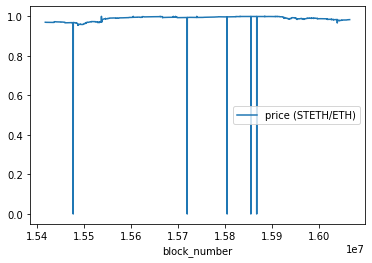

In [28]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

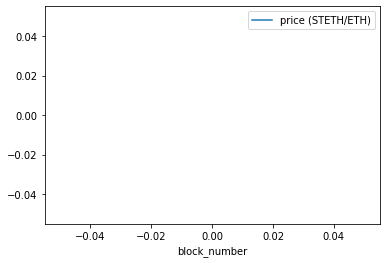

In [29]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

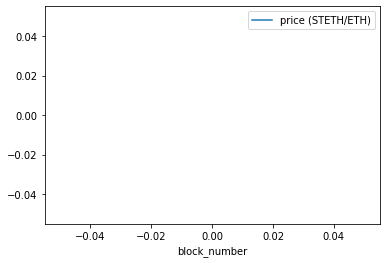

In [30]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [31]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict):
    return event_args[key]

for key in query_swaps.iloc[-1]['event_arguments'].keys():
    query_swaps[key] = query_swaps['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [32]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542,0xB85425D1988A2b8008863Fe24167847d0350981a,1,212843572202833648204,0,206491123822738232084
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb24FcDBa4A76c0F0Ae39F505c163CAb5C...,0x446da40ee0fa8db2d9822a4ef9ff54f89962431d0e58...,15416806,0xa510b0ef3d7cd329805cf2bb18481e834f604ee1f345...,445,166,0.970481,0xb24FcDBa4A76c0F0Ae39F505c163CAb5CD89fd29,1,179653406409401106541,0,174280479304408951778
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x5C3097E7Fd3B97d9fdeEC6D378884c892...,0x656a22262da7f7d1d06987d130e7b04f38aba3525fe2...,15416814,0x4eb315b5c04fb7d2ba0bae25da6ebe986a92cbd28fa5...,211,81,0.970453,0x5C3097E7Fd3B97d9fdeEC6D378884c892Ff0545F,1,300000000000000000,0,291019365930629512
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xe7b75976cbebd86ec038fffbccd2798c7d098dec02df...,15416846,0xfcf402dbfb254901785f6852bed5e5cad5291a2db65d...,74,59,0.970469,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,0,23830302373300670863,1,24545642959902663203
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x6ff798e136f984d88906335794234790c84d24762c42...,15416879,0x80cccc4c4d8872381dc4ae456f78ad7a3e70f2650494...,108,27,0.970474,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,8533932129863802820,1,8790057152954446617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18784,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756,0x28F7c0614ebbFD1b83fB6803E0CA61453D3E32B9,1,1000000000000000000,0,983362439515918813
18785,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755,0x58B03f7Cbf54293a426A8FF4E94d9891AFDE7b69,1,3194958453078403806,0,3141800578587178741
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x24dd7efdcb582fbcad8c5bad4358083374d7ba123031...,16064430,0xf24361a5b7ab9d8dc5080994eb966109d234487d341b...,114,78,0.983755,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,1,1580911535521578482,0,1554607356879844910
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xa6abc2bde5849f43f83b935357319df1f85e05155e5f...,16064435,0x2ead45ff26e34a00cf758b4b975f828dfb16f2a4e1b4...,33,5,0.983754,0x53222470CdcfB8081C0E3a50fd106f0D69e63F20,1,792157363535029691,0,778976739065007532


In [33]:
# now, check swaps where price spikes up to 1 between blocks 15132100 and 15132400
query_swaps[(query_swaps['block_number'] > 15132100) & (query_swaps['block_number'] < 15132400)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought


In [34]:
# ahh, ok :) .. someones selling 1 wei into the pool (see e.g. block 15132225)
# which is causing rounding issues for price calc

<AxesSubplot:xlabel='block_number'>

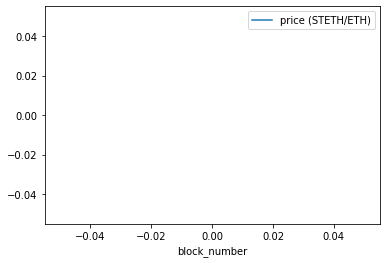

In [35]:
# are the dusting rounding issues also causing those spikes down to zero?
# look at first spike down to 0
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)].plot(x='block_number', y='price (STETH/ETH)')

In [36]:
# looks like it (see swap at block 14824840); similar rounding issues except rounded down to zero here
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought


In [37]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
query_swaps = query_swaps[query_swaps['tokens_bought'] > min_bought]

<AxesSubplot:xlabel='block_number'>

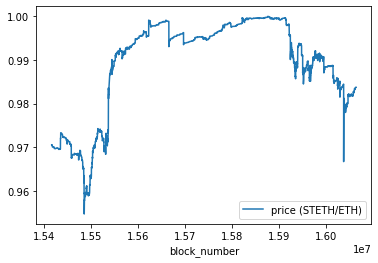

In [38]:
# nice! way better
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

In [39]:
# should smooth the price data out so not so jittery by averaging over 1h for hourly candles.
# keep the volumes numbers as well, so make some slight changes to the (tokens_bought, tokens_sold)
# columns to instead track (volume_coin0, volume_coin1) at each swap

In [40]:
# write a function that returns volume on coin indices for a swap (normalized by 1e18 for decimals)
def get_volume(coin_index: int, x: pd.Series) -> (float, float):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    volume = volume / 1e18
    return volume

In [41]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    query_swaps[key] = query_swaps.apply(lambda x: get_volume(coin_index, x), axis=1)

In [42]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542,0xB85425D1988A2b8008863Fe24167847d0350981a,1,212843572202833648204,0,206491123822738232084,206.491124,212.843572
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xb24FcDBa4A76c0F0Ae39F505c163CAb5C...,0x446da40ee0fa8db2d9822a4ef9ff54f89962431d0e58...,15416806,0xa510b0ef3d7cd329805cf2bb18481e834f604ee1f345...,445,166,0.970481,0xb24FcDBa4A76c0F0Ae39F505c163CAb5CD89fd29,1,179653406409401106541,0,174280479304408951778,174.280479,179.653406
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x5C3097E7Fd3B97d9fdeEC6D378884c892...,0x656a22262da7f7d1d06987d130e7b04f38aba3525fe2...,15416814,0x4eb315b5c04fb7d2ba0bae25da6ebe986a92cbd28fa5...,211,81,0.970453,0x5C3097E7Fd3B97d9fdeEC6D378884c892Ff0545F,1,300000000000000000,0,291019365930629512,0.291019,0.300000
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x27239549DD40E1D60F5B80B0C41969237...,0xe7b75976cbebd86ec038fffbccd2798c7d098dec02df...,15416846,0xfcf402dbfb254901785f6852bed5e5cad5291a2db65d...,74,59,0.970469,0x27239549DD40E1D60F5B80B0C4196923745B1FD2,0,23830302373300670863,1,24545642959902663203,23.830302,24.545643
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x6ff798e136f984d88906335794234790c84d24762c42...,15416879,0x80cccc4c4d8872381dc4ae456f78ad7a3e70f2650494...,108,27,0.970474,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,8533932129863802820,1,8790057152954446617,8.533932,8.790057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18784,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756,0x28F7c0614ebbFD1b83fB6803E0CA61453D3E32B9,1,1000000000000000000,0,983362439515918813,0.983362,1.000000
18785,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755,0x58B03f7Cbf54293a426A8FF4E94d9891AFDE7b69,1,3194958453078403806,0,3141800578587178741,3.141801,3.194958
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x24dd7efdcb582fbcad8c5bad4358083374d7ba123031...,16064430,0xf24361a5b7ab9d8dc5080994eb966109d234487d341b...,114,78,0.983755,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,1,1580911535521578482,0,1554607356879844910,1.554607,1.580912
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xa6abc2bde5849f43f83b935357319df1f85e05155e5f...,16064435,0x2ead45ff26e34a00cf758b4b975f828dfb16f2a4e1b4...,33,5,0.983754,0x53222470CdcfB8081C0E3a50fd106f0D69e63F20,1,792157363535029691,0,778976739065007532,0.778977,0.792157


In [43]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
query_swaps_filtered = query_swaps.filter(['block_number', 'price (STETH/ETH)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
query_swaps_filtered = query_swaps_filtered.set_index('block_number')

In [44]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(query_swaps_filtered.index.min(), query_swaps_filtered.index.max()+1)
query_swaps_filtered = query_swaps_filtered.reindex(new_index).ffill()

In [45]:
# separate data into windows of 260 blocks (~ 1h)
# remove first (last_block - first_block) % window rows so even candle windows
window = 260
first_index = (query_swaps_filtered.index[-1] - query_swaps_filtered.index[0]) % window
query_swaps_filtered = query_swaps_filtered[first_index:]

In [46]:
# smooth data using mean over 260 blocks for ~ 1h candles
s = (query_swaps_filtered.index.to_series() / window).astype(int)
query_swaps_candled = query_swaps_filtered.groupby(s).agg({'price (STETH/ETH)': ['first', 'max', 'min', 'last', 'mean'], 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
15416954              0.970474  0.970474  0.970474  0.970474  0.970474   
15417214              0.970474  0.970560  0.970474  0.970560  0.970511   
15417474              0.970560  0.970565  0.970482  0.970482  0.970541   
15417734              0.970482  0.970482  0.970482  0.970482  0.970482   
15417994              0.970482  0.970483  0.970440  0.970449  0.970465   
...                        ...       ...       ...       ...       ...   
16063574              0.983610  0.983611  0.983610  0.983611  0.983610   
16063834              0.983611  0.983759  0.983611  0.983758  0.983733   
16064094              0.983758  0.983758  0.983749  0.983756  0.983755   
16064354              0.983756  0.983756  0.983756  0.983756  0.983756   
16064614              0.983756  0.983764  0.983754  0.983764  0.983755   

              volume_coin0  volume_coin1  
                       sum           sum  
block_number                              
15416954          5.471286      5.640000  
15417214       3824.591525   3939.235397  
15417474       5741.830617   5918.040179  
15417734        203.718975    209.888565  
15417994       5643.080701   5813.911443  
...                    ...           ...  
16063574        145.161982    147.555331  
16063834      36398.597003  36987.950404  
16064094        347.816886    353.575013  
16064354        255.674234    260.000000  
16064614        343.456826    349.218348  

[2492 rows x 7 columns]

<AxesSubplot:xlabel='block_number'>

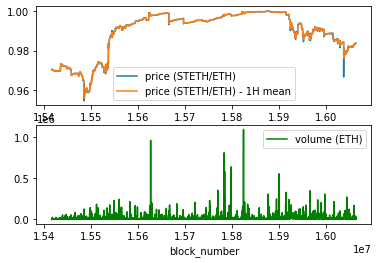

In [47]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
query_swaps.plot(x='block_number', y='price (STETH/ETH)', ax=ax[0])
query_swaps_candled['price (STETH/ETH)'].plot(y='mean', ax=ax[0], label='price (STETH/ETH) - 1H mean')
query_swaps_candled['volume_coin0'].plot(y='sum', color='g', ax=ax[1], label='volume (ETH)')

In [48]:
# plot the candles since that's dope :o

In [49]:
# get the timestamps every 24 candles (~ 24h) and interpolate the rest (SEE banteg gist again)
# NOTE: include last block in index for interp to work properly
T = 24
blocks = query_swaps_candled.index[::24].to_list() + [query_swaps_candled.index[-1]]

In [50]:
%time timestamps = [ chain.blocks[i].timestamp for i in blocks ]

CPU times: total: 391 ms
Wall time: 5.43 s


In [51]:
query_swaps_candled['timestamp'] = pd.to_datetime(np.interp(query_swaps_candled.index, blocks, timestamps) * 1e9)
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
15416954              0.970474  0.970474  0.970474  0.970474  0.970474   
15417214              0.970474  0.970560  0.970474  0.970560  0.970511   
15417474              0.970560  0.970565  0.970482  0.970482  0.970541   
15417734              0.970482  0.970482  0.970482  0.970482  0.970482   
15417994              0.970482  0.970483  0.970440  0.970449  0.970465   
...                        ...       ...       ...       ...       ...   
16063574              0.983610  0.983611  0.983610  0.983611  0.983610   
16063834              0.983611  0.983759  0.983611  0.983758  0.983733   
16064094              0.983758  0.983758  0.983749  0.983756  0.983755   
16064354              0.983756  0.983756  0.983756  0.983756  0.983756   
16064614              0.983756  0.983764  0.983754  0.983764  0.983755   

              volume_coin0  volume_coin1                     timestamp  
                       sum           sum                                
block_number                                                            
15416954          5.471286      5.640000 2022-08-26 18:36:16.000000000  
15417214       3824.591525   3939.235397 2022-08-26 19:36:01.958333184  
15417474       5741.830617   5918.040179 2022-08-26 20:35:47.916666624  
15417734        203.718975    209.888565 2022-08-26 21:35:33.875000064  
15417994       5643.080701   5813.911443 2022-08-26 22:35:19.833333248  
...                    ...           ...                           ...  
16063574        145.161982    147.555331 2022-11-27 20:02:14.157894912  
16063834      36398.597003  36987.950404 2022-11-27 20:54:34.368421120  
16064094        347.816886    353.575013 2022-11-27 21:46:54.578947328  
16064354        255.674234    260.000000 2022-11-27 22:39:14.789473792  
16064614        343.456826    349.218348 2022-11-27 23:31:35.000000000  

[2492 rows x 8 columns]

In [52]:
# put data into new df for ohlcv with 1h candles
query_swaps_ohlcv = pd.DataFrame({
    'Open': query_swaps_candled['price (STETH/ETH)']['first'],
    'High': query_swaps_candled['price (STETH/ETH)']['max'],
    'Low': query_swaps_candled['price (STETH/ETH)']['min'],
    'Close': query_swaps_candled['price (STETH/ETH)']['last'],
    'Volume': query_swaps_candled['volume_coin0']['sum'],
    'Date': query_swaps_candled['timestamp']
})
query_swaps_ohlcv = query_swaps_ohlcv.set_index('Date')
query_swaps_ohlcv

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-26 18:36:16.000000000,0.970474,0.970474,0.970474,0.970474,5.471286
2022-08-26 19:36:01.958333184,0.970474,0.970560,0.970474,0.970560,3824.591525
2022-08-26 20:35:47.916666624,0.970560,0.970565,0.970482,0.970482,5741.830617
2022-08-26 21:35:33.875000064,0.970482,0.970482,0.970482,0.970482,203.718975
2022-08-26 22:35:19.833333248,0.970482,0.970483,0.970440,0.970449,5643.080701
...,...,...,...,...,...
2022-11-27 20:02:14.157894912,0.983610,0.983611,0.983610,0.983611,145.161982
2022-11-27 20:54:34.368421120,0.983611,0.983759,0.983611,0.983758,36398.597003
2022-11-27 21:46:54.578947328,0.983758,0.983758,0.983749,0.983756,347.816886


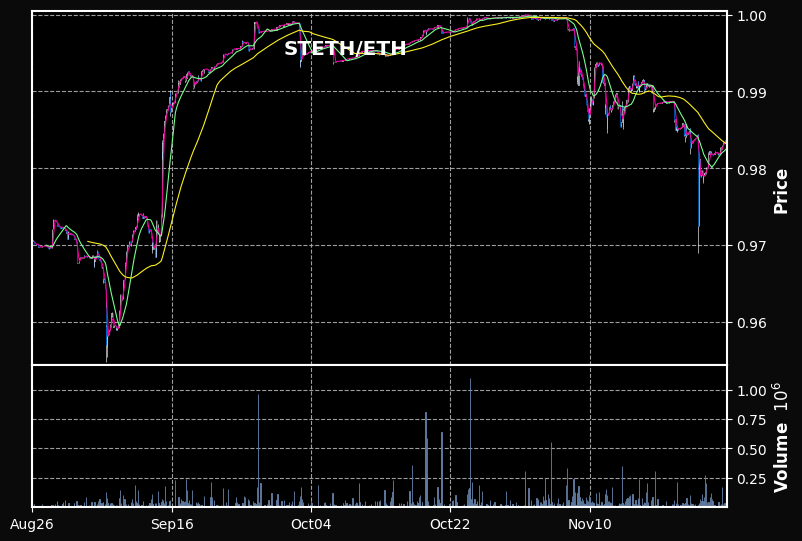

In [53]:
# oooooo fancy :)
def fancy_plot(
    data,
    mav=(10, 50),
    plt_type='candle',
    volume=True,
    datetime_format='%b%d',
    xrotation=0,
    tight_layout=True,
    style='mike', # mpf.available_styles() to pick your fav
    **kwargs
):
    mpf.plot(
        data,
        warn_too_much_data=2500,
        mav=mav,
        type=plt_type,
        volume=volume,
        datetime_format=datetime_format,
        xrotation=xrotation,
        tight_layout=tight_layout,
        style=style,
        **kwargs
    )

title="STETH/ETH"
fancy_plot(query_swaps_ohlcv, mav=(10, 50, 200), title=title)


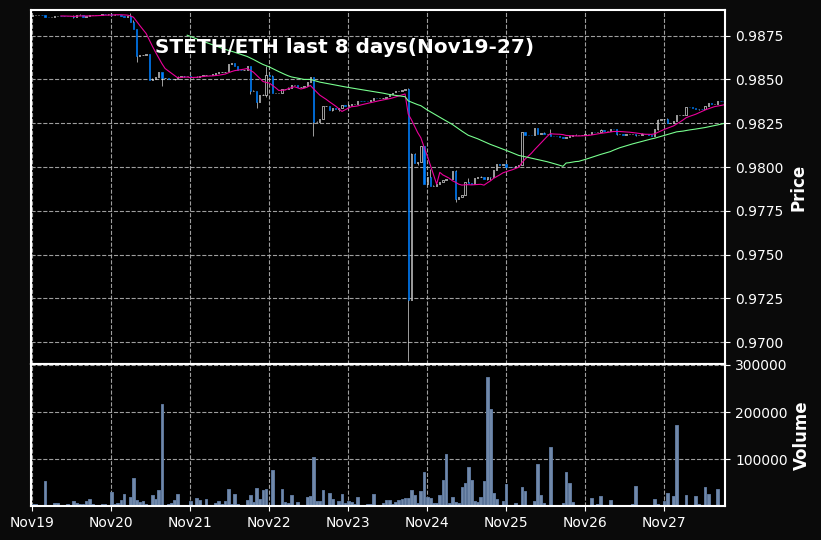

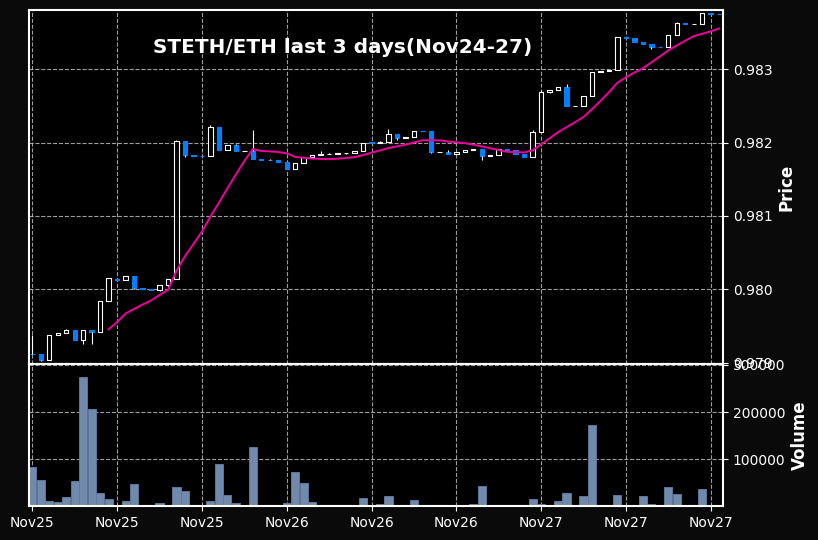

In [54]:
def plot_last_n_days(data, num_days_back=100, **kwargs):
    endPeriod = query_swaps_ohlcv.index[-1]
    startPeriod = endPeriod - pd.Timedelta(days=num_days_back)
    dataToPlot = data.loc[(data.index > startPeriod) & (data.index < endPeriod),:]
    title=f"STETH/ETH last {num_days_back} days"
    title+=f"({startPeriod:%b%d}-{endPeriod:%b%d})" if startPeriod.month != endPeriod.month else f"({startPeriod:%b%d}-{endPeriod:%d})"
    mav = [10]
    if num_days_back > 3:
        mav.append(50)
    if num_days_back > 10:
        mav.append(100)
    fancy_plot(dataToPlot, mav=mav, title=title)

plot_last_n_days(query_swaps_ohlcv, num_days_back=8)
plot_last_n_days(query_swaps_ohlcv, num_days_back=3)
